In [1]:
import pandas as pd
import numpy as np
from semopy import Model
import semopy
import matplotlib.pyplot as plt 
import seaborn as sns
from pathlib import Path
from scipy import stats

In [2]:
current_dir = Path.cwd().parents[0]

FILE_PATH = "/data_files/job_performance.csv"

df = pd.read_csv(str(current_dir)+FILE_PATH)

# Objetivo

Una empresa quiere medir el **desempeño de sus 1000 empleados**. Dado que *no se puede medir directamente* usaremos un dataset con variables que sí son directamente observables para saber cómo "observar" esta variable. 


Tiene un dataset con las siguientes variables: 

- PsychTest1: Test psicológico. Score del 0 - 100. 

- PsychTest2: Test psicológico. Score del 0 - 100. 

- YrsEdu: Años de educación superior. 

- IQ: Resultados de test de IQ. 

- HrsTrn: Horas dedicadas a la superación personal fuera del trabajo. 

- HrsWrk: Horas trabajadas a la semana. 

- ClientSat: Satisfacción del cliente con el trabajador. Score del 0 - 100. 

- SuperSat: Satisfacción del manager con el trabajador. Score del 0 - 100. 

- ProjCompl: Porcentage de proyectos completos. Del 0 - 100. 

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   PsychTest1  1000 non-null   int64
 1   PsychTest2  1000 non-null   int64
 2   YrsEdu      1000 non-null   int64
 3   IQ          1000 non-null   int64
 4   HrsTrn      1000 non-null   int64
 5   HrsWrk      1000 non-null   int64
 6   ClientSat   1000 non-null   int64
 7   SuperSat    1000 non-null   int64
 8   ProjCompl   1000 non-null   int64
dtypes: int64(9)
memory usage: 70.4 KB


In [21]:
df.describe()

,PsychTest1,PsychTest2,YrsEdu,IQ,HrsTrn,HrsWrk,ClientSat,SuperSat,ProjCompl
count,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.99000,49.28600,2.506000,97.587000,6.028000,47.810000,54.970000,49.912000,48.127000
std,10.04992,15.01938,1.716074,3.719175,2.484228,24.080568,18.002922,17.190747,20.541052
min,20.00000,5.00000,0.000000,90.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43.00000,38.75000,1.000000,95.000000,4.000000,30.000000,43.000000,38.000000,33.000000
50%,50.00000,50.00000,3.000000,97.000000,6.000000,47.000000,55.000000,50.000000,48.000000
75%,57.00000,60.00000,4.000000,101.000000,8.000000,64.000000,67.000000,62.000000,63.000000
max,81.00000,90.00000,5.000000,105.000000,17.000000,100.000000,100.000000,100.000000,100.000000


# Measurement Model

In [26]:
measurement_model = """
# measurement model
    JobPerf =~ ClientSat + SuperSat + ProjCompl
"""

In [27]:
cfa_model = semopy.Model(measurement_model)

# Fit the model using the data
cfa_model.fit(df)

# Show the results using the inspect method
cfa_model.inspect(std_est=True)

,lval,op,rval,Estimate,Est. Std,Std. Err,z-value,p-value
0,ClientSat,~,JobPerf,1.000000,0.387926,-,-,-
1,SuperSat,~,JobPerf,2.450362,1.000000,0.226522,10.817337,0.0
2,ProjCompl,~,JobPerf,2.368748,0.812749,0.185897,12.742245,0.0
3,JobPerf,~~,JobPerf,49.145920,1.000000,8.147149,6.032285,0.0
4,ClientSat,~~,ClientSat,277.433849,0.849513,12.68643,21.868552,0.0
5,ProjCompl,~~,ProjCompl,141.701634,0.339439,16.147501,8.775453,0.0
6,SuperSat,~~,SuperSat,0.000000,0.000000,15.893106,0.0,1.0


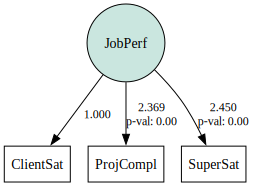

In [28]:
from semopy import semplot

semplot(cfa_model, 'data_files/pd.png')

# Structural Model

In [15]:
model_spec = """
  # measurement model
    JobPerf =~ ClientSat + SuperSat + ProjCompl
    Social =~ PsychTest1 + PsychTest2
    Intellect =~ YrsEdu + IQ
    Motivation =~ HrsTrn + HrsWrk
    # regressions
  JobPerf ~ Social + Intellect + Motivation
"""

# Instantiate the model
model = semopy.Model(model_spec)

# Fit the model using the data
model.fit(df)

# Show the results using the inspect method
model.inspect()

,lval,op,rval,Estimate,Std. Err,z-value,p-value
0,JobPerf,~,Social,5.213678e-01,0.047876,10.890025,0.0
1,JobPerf,~,Intellect,1.030137e+00,0.115617,8.909922,0.0
2,JobPerf,~,Motivation,2.964009e+00,0.254836,11.631054,0.0
3,ClientSat,~,JobPerf,1.000000e+00,-,-,-
4,SuperSat,~,JobPerf,2.509578e+00,0.208715,12.02396,0.0
5,ProjCompl,~,JobPerf,2.572991e+00,0.219436,11.725482,0.0
6,PsychTest1,~,Social,1.000000e+00,-,-,-
7,PsychTest2,~,Social,2.340735e+00,0.094702,24.716848,0.0
8,YrsEdu,~,Intellect,1.000000e+00,-,-,-
9,IQ,~,Intellect,4.670095e+00,0.4963,9.409832,0.0


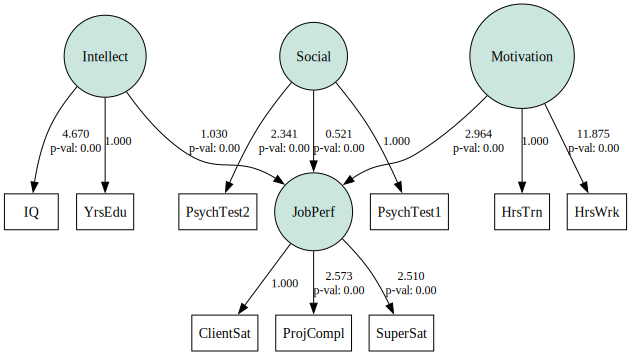

In [16]:
from semopy import semplot

semplot(model, 'data_files/pd.png')